<a href="https://colab.research.google.com/github/seh363/Dynasty-Lifecycle-Using-KeepTradeCut/blob/main/KeepTradeCut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Managers = ["Christian", "Danny", "Chris", "Hoopes", "Max", "Mike", "Paul", "Pete", "Alex", "Zach"]
Players = [["Allen Robinson", "Austin Hooper", "Chase Edmonds", "Demarcus Robinson", "Hassan Haskins", "J.D. McKissic", "Jahan Dotson", "Jakobi Meyers", "Jalen Hurts", "Joe Mixon", "Josh Allen", "Khalil Shakir", "Miles Sanders", "Pat Freiermuth", "Rachaad White", "Sammy Watkins", "Stefon Diggs", "Zach Ertz", "Zach Pascal", "Zack Moss"], 
           ["Alexander Mattison", "Antonio Gibson", "Chris Godwin", "D'Andre Swift", "David Montgomery", "DeVante Parker", "Diontae Johnson", "George Pickens", "Harrison Bryant", "Juwan Johnson", "Kenny Pickett", "Kyle Pitts", "Lamar Jackson", "Leonard Fournette", "Mack Hollins", "Nico Collins", "Nyheim Hines", "Romeo Doubs", "Terry McLaurin", "Treylon Burks", "Tyquan Thornton"], 
           ["Aaron Jones", "Adam Thielen", "Chris Olave", "Chuba Hubbard", "Clyde Edwards-Helaire", "Dallas Goedert", "Darren Waller", "Derrick Henry", "DeVonta Smith", "Gus Edwards", "Joe Burrow", "Justin Jefferson", "Kareem Hunt", "Kenyan Drake", "Mac Jones", "Mecole Hardman", "Michael Gallup", "Mike Evans", "Ronald Jones", "Trey Lance", "Tyler Conklin", "Tyler Lockett"], 
           ["Breece Hall", "Cam Akers", "Chigoziem Okonkwo", "Christian McCaffrey", "Cooper Kupp", "Curtis Samuel", "D.J. Moore", "DeAndre Hopkins", "Drake London", "George Kittle", "Javonte Williams", "Jerick McKinnon", "JuJu Smith-Schuster", "Justin Herbert", "Keenan Allen", "Patrick Mahomes", "Rashid Shaheed", "Rashod Bateman", "Travis Etienne", "Travis Kelce", "Tyreek Hill"],
           ["AJ Dillon", "Alvin Kamara", "Amon-Ra St. Brown", "Brock Purdy", "Christian Kirk", "Corey Davis", "Dalton Schultz", "Darius Slayton", "Deebo Samuel", "Desmond Ridder", "DK Metcalf", "Geno Smith", "Greg Dortch", "Hayden Hurst", "James Conner", "Jeffery Wilson", "Joshua Kelley", "Kirk Cousins", "Marquez Valdes-Scantling", "Michael Carter"],
           ["Alec Pierce", "Amari Cooper", "Andy Dalton", "Austin Ekeler", "Cordarrelle Patterson", "Dak Prescott", "Devin Duvernay", "Elijah Moore", "Evan Engram", "Ezekiel Elliott", "Garrett Wilson", "Jamaal Williams", "Jerry Jeudy", "John Metchie", "Melvin Gordon", "Parris Campbell", "Rashaad Penny", "Robert Woods", "Russell Gage", "Samaje Perine", "T.J. Hockenson", "Tyler Boyd"],
           ["A.J. Brown", "Allen Lazard", "Brandin Cooks", "Daniel Jones", "Davante Adams", "Derek Carr", "Donovan Peoples-Jones", "Gerald Everett", "Hunter Renfrow", "Isiah Pacheco", "Jalen Tolbert", "Jaylen Warren", "Jonathan Taylor", "Josh Palmer", "Kadarius Toney", "Mike Gesicki", "Najee Harris", "Noah Fant", "Raheem Mostert", "Saquon Barkley", "Tee Higgins", "Wan'Dale Robinson"],
           ["Aaron Rodgers", "Baker Mayfield", "Calvin Ridley", "Chase Claypool", "Christian Watson", "D.J. Chark", "Dameon Pierce", "Darnell Mooney", "David Njoku", "Devin Singletary", "Dontrell Hilliard", "Greg Dulcich", "Isaiah Hodgins", "Isaiah Likely", "Jared Goff", "K.J. Osborn", "Khalil Herbert", "Kyren Williams", "Michael Thomas", "Rondale Moore", "Skyy Moore", "Tim Patrick", "Tyler Allgeier", "Tyler Higbee", "Zay Jones"],
           ["Brandon Aiyuk", "David Bell", "Dawson Knox", "Deshaun Watson", "Isaiah McKenzie", "Isaiah Spiller", "J.K. Dobbins", "James Cook", "James Robinson", "Jameson Williams", "Jaylen Waddle", "Justin Fields", "Kenneth Gainwell", "Kenneth Walker III", "Marquise Brown", "Mike Williams", "Odell Beckham", "Rhamondre Stevenson", "Robert Tonyan", "Tony Pollard", "Trey McBride"],
           ["Brian Robinson", "CeeDee Lamb", "Cole Kmet", "Courtland Sutton", "D'Onta Foreman", "Dalvin Cook", "Damien Harris", "Elijah Mitchell", "Gabriel Davis", "Ja'Marr Chase", "Jelani Woods", "Josh Jacobs", "Kyler Murray", "Mark Andrews", "Marquise Goodwin", "Michael Pittman", "Nick Chubb", "Terrace Marshall", "Trevor Lawrence", "Tua Tagovailoa", "Zamir White", "Zonovan Knight"]
]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup

def getTradeValues(superflex=False, include_picks=False):
    url = 'https://keeptradecut.com/dynasty-rankings?filters=QB|WR|RB|TE'
    if include_picks:
        url = url + '|RDP'
    if not superflex:
        url = url + '&format=1'
    players = BeautifulSoup(get(url).text, features='lxml').select('div[id=rankings-page-rankings] > div')
    player_list = []
    for player in players:
        e = player.select('div[class=player-name] > p > a')[0]
        pid = e.get('href').split('/')[-1]
        name = e.text.strip()
        try:
            team = player.select('div[class=player-name] > p > span[class=player-team]')[0].text.strip()
        except:
            team = None
        position = player.select('p[class=position]')[0].text.strip()[:2]
        position = 'PICK' if position == 'PI' else position
        try:
            age = player.select('div[class=position-team] > p')[1].text.strip()[:2]
        except:
            age = None
        val = int(player.select('div[class=value]')[0].text.strip())
        val_colname = 'Value' if superflex else 'Value'
        player_list.append({'PlayerID':pid,'Name':name,'Team':team,'Position':position,'Age':age,val_colname:val})
    return pd.DataFrame(player_list)

value_df = getTradeValues(superflex=False, include_picks=False)

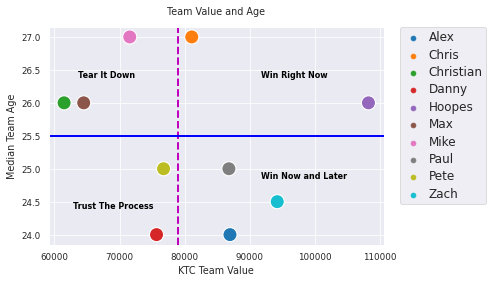

In [ ]:
df = pd.DataFrame(list(zip(Managers, Players)), columns = ['Managers', 'Players']).explode("Players").reset_index(drop=True)
df2 = pd.merge(value_df,df[['Managers', 'Players']],left_on = 'Name', right_on = 'Players', how='left').reset_index(drop=True)
df3 = df2.groupby('Managers')['Value'].sum()
df4 = df2.groupby('Managers')['Age'].median()
df5 = pd.merge(df3, df4, left_on='Managers', right_on='Managers', how='left')
sns.set_context('paper')
sns.set_style('darkgrid')
fig, ax = plt.subplots()
sns.scatterplot(data=df5, x="Value", y="Age", hue="Managers", s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
ax.axvline(x=df5['Value'].median(), color='m', linestyle='--', linewidth=2)
ax.axhline(y=df5['Age'].median(), color='b', linestyle='-', linewidth=2)
plt.ylabel("Median Team Age")
plt.xlabel("KTC Team Value")
plt.title("Team Value and Age", y=1.03)
plt.text(df5['Value'].quantile(.05), df5['Age'].quantile(.2), "Trust The Process", horizontalalignment='left', size='small', color='black', weight='semibold')
plt.text(df5['Value'].quantile(.08), df5['Age'].quantile(.82), "Tear It Down", horizontalalignment='left', size='small', color='black', weight='semibold')
plt.text(df5['Value'].quantile(.85), df5['Age'].quantile(.82), "Win Right Now", horizontalalignment='left', size='small', color='black', weight='semibold')
plt.text(df5['Value'].quantile(.85), df5['Age'].quantile(.3), "Win Now and Later", horizontalalignment='left', size='small', color='black', weight='semibold')
plt.show()

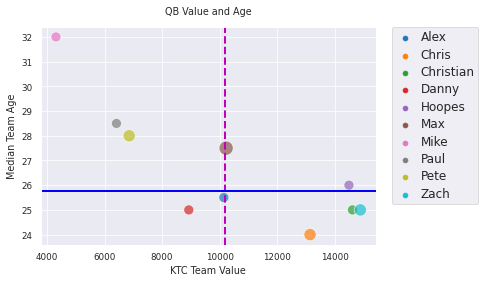

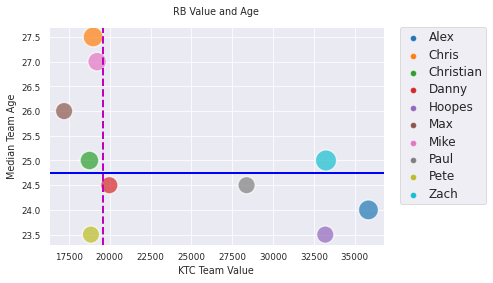

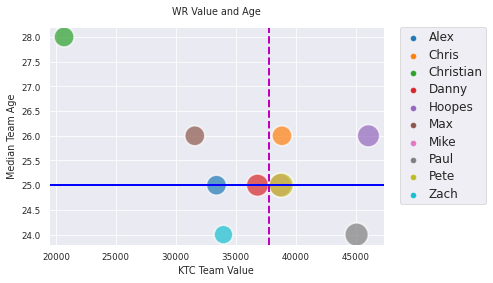

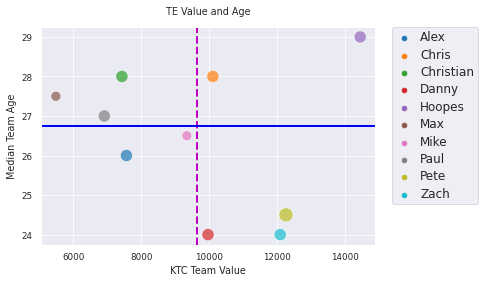

In [ ]:
position = ['QB', 'RB', 'WR', 'TE']

for x in position:
  dfPosition = df2[df2['Position'] == x]
  df6 = dfPosition.groupby('Managers')['Value'].sum()
  df7 = dfPosition.groupby('Managers')['Age'].median()
  df8 = pd.merge(df6, df7, left_on='Managers', right_on='Managers', how='left')
  df9 = dfPosition.groupby('Managers')['Value'].count()
  df10 = pd.merge(df8, df9, left_on='Managers', right_on='Managers', how='left').rename(columns={"Value_x": "Value", "Value_y": "Count"})
  sns.set_context('paper')
  sns.set_style('darkgrid')
  fig, ax = plt.subplots()
  sns.scatterplot(data=df10, x="Value", y="Age", hue="Managers", s = df10['Count'] * 50, alpha = 0.7)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
  plt.setp(ax.get_legend().get_texts(), fontsize='12')
  ax.axvline(x=df8['Value'].median(), color='m', linestyle='--', linewidth=2)
  ax.axhline(y=df8['Age'].median(), color='b', linestyle='-', linewidth=2)
  plt.ylabel("Median Team Age")
  plt.xlabel("KTC Team Value")
  plt.title(x + " Value and Age", y=1.03)
  plt.show()

In [ ]:
df2.to_csv('Keep Trade Cut Values by Manager.csv')